# Comparison of content between Netflix, Amazon Prime, Disney+ and HBO Max
## 1. Introduction
The online streaming domain has been heating up with the entry of Disney+, Apple, HBO Max. However, Netflix remains the biggest player in the market with Amazon Prime Video and Disney+ trailing slightly behind it. 

In this project I have compared the content between Amazon, Dinsey+, HBO Max and Netflix to gather insights into this online streaming war. The main questions that I am interested in are- <br>
1) Which streaming platform has the latest content? <br>
2) Does a particular streaming platform have more high quality content (IMDB rating) comapred to others? <br>
3) Does a particular streaming platform have more fresh tomato content (Rotten Tomato rating) comapred to others? <br>
4) How does the amount of content in different streaming platform vary for different age groups? <br>
5) Which platform has the highest rated IMDB shows available online? <br>
6) How much original contents are Netflix and Amazon creating? <br>
7) In which genres is Netflix creating more original content? <br>
8) Which genres are the most popular among Netflix and Amazon? <br>

All the data used in this project are taken from- <br>
1) https://reelgood.com/ <br>
2) https://www.finder.com/ <br>
3) https://www.wikipedia.org/

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import seaborn as sns
import json
import time
import re

## 2. Data Gathering
The catalog for Amazon Prime Video, Netflix, Disney+ and HBO Max have been scraped from reelgood.com which is an online streaming aggregator and helps one watch all the online content in one place. <br>
The genre of the TV shows and movies have been scraped from Finder.com which is a service used for comparing products such as credit cards, mortgages etc.

### 2.1 Gathering from reelgood.com

In [2]:
# Extracting the content from reelgood.com using Beautiful Soup

def reel_good_scraping(total_content,url_base):
    """ Extracting the content from reelgood.com using Beautiful Soup
    Input: total number of pages that has the content (int) and base URL
    Output: Pandas Dataframe"""
    
    start= time.time()

    for page in range(0,total_content,50): # List of all the pages in the website

        print(page, end=',') # for telling the status of the current iteration

        time.sleep(np.random.randint(5,25))

        try:

            # URL for the reelgood website
            url = url_base +str(page)

            # Extracting the HTML elements with Beautiful soup
            response= requests.get(url)
            soup = BeautifulSoup(response.content, 'html.parser' )

            # Finding the number of titles in the extracted page
            page_length= len(soup.find_all('td', class_="css-1u7zfla e126mwsw1"))

            # Initiating empty lists to make the dataframe
            title= []
            year = []
            age_group= []
            imdb= []
            rt=[]

            for i in range(page_length):
                # extracting the title from the soup element
                title.append(soup.find_all('td', class_="css-1u7zfla e126mwsw1")[i].find('a').contents[0])

                # extracting the year information from the soup element
                year.append(soup.find_all('td', class_="css-1u11l3y")[4*i].contents[0])

                # extracting the age group detail from the soup element
                age_group.append(soup.find_all('td', class_="css-1u11l3y")[4*i+1].contents[0])

                # extracting the imdb rating from the soup element
                imdb.append(soup.find_all('td', class_="css-1u11l3y")[4*i+2].contents[0])

                # extracting the rotten tomatoes rating from the soup element
                rt.append(soup.find_all('td', class_="css-1u11l3y")[4*i+3].contents[0])

                # forming a dataframe for each iteration
                df_temp = pd.DataFrame({'title':title,'year':year,'age_group':age_group, 'imdb':imdb,'rotten_tomato':rt} )

            if page==0:
                df = df_temp

            else:
                df = pd.concat([df, df_temp]) # appending the dataframe for each iteration

        except:
            print('Error on page:',page)
            continue

    end= time.time()
     
    print(round(end-start,0),'s')
    
    return df

In [3]:
# exporting the netflix content
df= reel_good_scraping(5801,'https://reelgood.com/source/netflix?offset=')

#Exporting the data to local hard drive
df.to_csv(r'C:\Users\srini\Projects\Online Streaming\netflix_shows.csv', index=False)

In [4]:
# exporting the Prime Video content
df= reel_good_scraping(15651,'https://reelgood.com/source/amazon?offset=')

#Exporting the data to local hard drive
df.to_csv(r'C:\Users\srini\Projects\Online Streaming\amazon.csv', index=False)

In [5]:
# exporting the Dinsey Plus content
df= reel_good_scraping(801,'https://reelgood.com/source/disney_plus?offset=')

#Exporting the data to local hard drive
df.to_csv(r'C:\Users\srini\Projects\Online Streaming\disney_plus.csv', index=False)

In [6]:
# exporting the HBO Max content
df= reel_good_scraping(2001,'https://reelgood.com/source/hbo_max?offset=')

#Exporting the data to local hard drive
df.to_csv(r'C:\Users\srini\Projects\Online Streaming\hbo_max.csv', index=False)

In [7]:
# # exporting the Hulu content
# df= reel_good_scraping(2801,'https://reelgood.com/source/hulu?offset=')

# #Exporting the data to local hard drive
# df.to_csv(r'C:\Users\srini\Projects\Online Streaming\hulu.csv', index=False)

### 2.2 Gathering from finder.com
Finder.com has the genre and the original content information. However, it does not have this information for HBO Max content.

In [8]:
#Returns the movie/tv show genre and other details from finder.com

def genre_extract(url):
    """ Returns the movie/tv show genre and other details from finder.com
    args- url of finder.com
    output: dataframe with the movie/tv show information"""
    response= requests.get(url)
    return pd.read_html(response.content)[0]

In [9]:
# Extracting information for Netflix TV shows
df_netflix_tv= genre_extract('https://www.finder.com/netflix-tv-shows')

# Extracting information for Netflix movies
df_netflix_movie = genre_extract('https://www.finder.com/netflix-movies')

# Extracting information for Amazon Movies
df_amazon_movie = genre_extract('https://www.finder.com/amazon-prime-movies')

# Extracting information for Amazon TV shows
df_amazon_tv = genre_extract('https://www.finder.com/amazon-prime-tv-shows')

In [10]:
# Extracting information for Disney+ shows
df_disney_shows = genre_extract('https://www.finder.com/complete-list-disney-plus-movies-tv-shows-exclusives')

### 2.3 Gathering from Wikipedia
The Amazon Prime original information could not be found from Finder.com. So we will scrape it from Wikipedia.

In [11]:
url_wiki= 'https://en.wikipedia.org/wiki/List_of_original_programs_distributed_by_Amazon'

response= requests.get(url_wiki)

In [12]:
# Extracting the Amazon Original Content from Wiki

for i in range(1,23):
    
    if i==1:
        df_prime_wiki= pd.read_html(response.content)[i]
    else:
        df_prime_wiki = pd.concat([df_prime_wiki,pd.read_html(response.content)[i]], sort= False)
    
df_prime_wiki.shape

(291, 13)

In [13]:
# Exporting content to local drive
df_prime_wiki.to_csv(r'C:\Users\srini\Projects\Online Streaming\prime_original.csv')

#df_prime_wiki= df_prime_wiki[['Title','Language']]
df_prime_wiki.head(2)

,Title,Genre,Premiere,Seasons/episodes,Status,Partner,Previous channel,Prime Video exclusive region,Language,Unnamed: 6,Unnamed: 7,Seasons,Previous channel(s)
0,Bosch,Detective fiction,"February 13, 2015","6 seasons, 60 episodes",Renewed for final season[2],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hand of God,Psychological thriller,"September 4, 2015","2 seasons, 20 episodes",Ended[3],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Data Wrangling
### 3.1 Merging dataframes
Combining Netflix, Amazon, Disney and HBO Max into a common dataframe to help with analysis

In [14]:
# Retriving the data from local hard drive
df_netflix= pd.read_csv(r'C:\Users\srini\Projects\Online Streaming\netflix_shows.csv')
df_amazon= pd.read_csv(r'C:\Users\srini\Projects\Online Streaming\amazon.csv')
df_disney = pd.read_csv(r'C:\Users\srini\Projects\Online Streaming\disney_plus.csv')
df_hbo= pd.read_csv(r'C:\Users\srini\Projects\Online Streaming\hbo_max.csv')

In [15]:
df_netflix.head()

,title,year,age_group,imdb,rotten_tomato
0,Breaking Bad,2008,18+,9.5,96%
1,Inception,2010,13+,8.8,87%
2,Back to the Future,1985,7+,8.5,96%
3,The Matrix,1999,18+,8.7,88%
4,The Silence of the Lambs,1991,18+,8.6,96%


In [16]:
# Adding a column to indicate the streaming platform
df_netflix['streaming']= 'Netflix'
df_amazon['streaming']= 'Amazon'
df_disney['streaming']= 'Disney+'
df_hbo['streaming']= 'HBO'

In [17]:
df_amazon.head()

,title,year,age_group,imdb,rotten_tomato,streaming
0,The Silence of the Lambs,1991,18+,8.6,96%,Amazon
1,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,Amazon
2,The Pianist,2002,18+,8.5,95%,Amazon
3,The Avengers,2012,13+,8.0,92%,Amazon
4,Knives Out,2019,13+,7.9,97%,Amazon


In [18]:
# combining the dataframes
df= pd.concat([df_netflix, df_amazon, df_disney, df_hbo], sort= False)
df.head()

,title,year,age_group,imdb,rotten_tomato,streaming
0,Breaking Bad,2008,18+,9.5,96%,Netflix
1,Inception,2010,13+,8.8,87%,Netflix
2,Back to the Future,1985,7+,8.5,96%,Netflix
3,The Matrix,1999,18+,8.7,88%,Netflix
4,The Silence of the Lambs,1991,18+,8.6,96%,Netflix


In [19]:
df.shape

(24341, 6)

### 3.2 Finding duplicates


In [20]:
# finding duplicate values
df.duplicated().sum()

2

In [21]:
# finding duplicate values
df[df.duplicated()]

,title,year,age_group,imdb,rotten_tomato,streaming
3938,El día menos pensado,2020,NaN,7.3,NaN,Netflix
4612,Lucid Dream,2017,NaN,6.1,NaN,Netflix


In [22]:
# removing the duplicate values
df.drop_duplicates(inplace= True)

In [23]:
# Checking
df.duplicated().sum()

0

### 3.3 Resetting the index
Since we concatenated 4 dataframes we need to remove the duplicate indices.

In [24]:
df.reset_index(inplace= True)
df.head(1)

,index,title,year,age_group,imdb,rotten_tomato,streaming
0,0,Breaking Bad,2008,18+,9.5,96%,Netflix


In [25]:
df.drop(columns='index', inplace= True)
df.head(1)

,title,year,age_group,imdb,rotten_tomato,streaming
0,Breaking Bad,2008,18+,9.5,96%,Netflix


### 3.4 Changing data type for  rotten tomatoes columns
Changing the rotten tomatoes columns to float values.

In [26]:
def rt_float_extract(x):
    """Function to extract the digits from the Rotten Tomatoes column
    Input: single rotten tomatoe rating value
    Output: float value"""
    try:
        temp= float(x[:2])
    except:
        temp= np.nan
    return temp

In [27]:
# extracting the digits from the Rotten Tomatoes column
df.rotten_tomato= df.rotten_tomato.apply(lambda x: rt_float_extract(x) )

In [28]:
df.head(2)

,title,year,age_group,imdb,rotten_tomato,streaming
0,Breaking Bad,2008,18+,9.5,96.0,Netflix
1,Inception,2010,13+,8.8,87.0,Netflix


### 3.5 Cleaning Netflix data from finder.com
- We need to extract the original content information from the Title. <br>
- Dropping the 'Watch it' column from TV shows and movies dataframes. <br>
- Clean the title information so that it doesnt have Season and Original info from TV show dataframe. <br>

In [29]:
df_netflix_movie.head()

,Title,Year of release,Runtime (mins),Genres,Watch it
0,#Rucker50,2016,56,Basketball Movies,Watch now
1,#Selfie,2014,125,Comedies,Watch now
2,#Selfie 69,2016,119,Comedies,Watch now
3,#cats_the_mewvie,2020,90,Canadian Movies,Watch now
4,#realityhighOriginal,2017,99,Comedies,Watch now


In [30]:
# Finding which title are Netflix original movies
df_netflix_movie['original']= df_netflix_movie.Title.apply(lambda x:True if len(re.findall('[^\s]Original',x))>0 else False)

In [31]:
# Finding which title are Netflix original TV shows
df_netflix_tv['original']= df_netflix_tv.Title.apply(lambda x:True if len(re.findall('[^\s]Original',str(x)))>0 else False)

In [32]:
# dropping the Watch it column
df_netflix_tv.drop(columns='Watch it', inplace= True)
df_netflix_tv.head(1)

,Title,Year of release,Genres,original
0,100 HumansOriginalSeason 1 (8 episodes),2020,Science & Nature Docs Social & Cultural Docs D...,True


In [33]:
# dropping the Watch it column
df_netflix_movie.drop(columns='Watch it', inplace= True)
df_netflix_movie.head(1)

,Title,Year of release,Runtime (mins),Genres,original
0,#Rucker50,2016,56,Basketball Movies,False


In [34]:
# Function to return the title of the TV show/ movie cleaning the Original and Season information
def title_cleaning(x):
    for i in ['Original','Season','Collection']:
        if i in x:
            return x.split(i)[0]

In [35]:
# making a new column with the cleaned title for Netflix
df_netflix_tv['Title']= df_netflix_tv.Title.apply(lambda x: title_cleaning(x))
df_netflix_tv.head(1)

,Title,Year of release,Genres,original
0,100 Humans,2020,Science & Nature Docs Social & Cultural Docs D...,True


In [36]:
# making a new column with the cleaned title for Amazon TV and Disney Shows

df_amazon_tv['Title']= df_amazon_tv.Title.apply(lambda x: title_cleaning(x))
#df_disney_shows['Title']= df_disney_shows.Title.apply(lambda x: title_cleaning(x))

### 3.6 Adding TV vs Movie column in the finder.com dataframes
- We need to add if the content is a TV or a movie

In [37]:
df_netflix_tv['type']='TV'
df_netflix_movie['type']='Movie'
df_amazon_movie['type']='Movie'
df_amazon_tv['type']='TV'

In [38]:
# Since Disney+ does not have seperate column for movie/tv type we can extract that info by seeing if the Title as 'Season'
# keyword in it

df_disney_shows['type'] =df_disney_shows.Title.apply(lambda x: 'TV' if 'Season' in x else 'Movie')
df_disney_shows.head(3)

,Title,Year of release,Genres,type
0,Marvel Studios' Avengers: Endgame,2019,Superhero Fantasy Action-Adventure Science Fic...,Movie
1,Marvel Studios' Captain Marvel,2019,Superhero Action-Adventure Science Fiction,Movie
2,Marvel Studios' Iron Man 3,2013,Superhero Action-Adventure Science Fiction,Movie


### 3.7 Cleaning Amazon prime originals from Wikipedia
- Cleaning the date to include the year
- Removing unnecesary columns

In [39]:
# Removing the future dated content that have not been released
df_prime_wiki= df_prime_wiki.query('Premiere!="TBA"')
df_prime_wiki= df_prime_wiki.query('Premiere!="Upcoming"')
df_prime_wiki= df_prime_wiki.query('Premiere!="Late 2020; Renewed"')

In [40]:
#extracting the year info from the Premiere date
def date_clean(x):
    """extracting the year info from the Premiere date"""
    if '[' in x:
        return int(x.split('[')[0][-4:])
    elif 'ewed' in x:
        return int(x.split(';')[0][-4:])
    else:
        return int(x[-4:])

In [41]:
df_prime_wiki.Premiere= df_prime_wiki.Premiere.apply(lambda x: date_clean(x))

In [42]:
# removing unnecesary columns
df_prime_wiki= df_prime_wiki.iloc[:,:3]

In [43]:
# editing column names
df_prime_wiki['type']= 'TV'
df_prime_wiki['streaming']= 'Amazon'
df_prime_wiki.rename(columns={'Genre':'Genres', 'Premiere':'Year of release'}, inplace= True)

In [44]:
# merging the Prime original with Amazon dataframe
df_amazon_tv= pd.concat([df_prime_wiki, df_amazon_tv], sort= False )
df_amazon_tv.shape

(4939, 5)

In [45]:
# resetting the index
df_amazon_tv.reset_index(inplace= True)
df_amazon_tv.drop(columns='index', inplace= True)

### 3.8 Concatenating the dataframes
- We need to add a column for streaming service before merging the dataframes.

In [46]:
# adding a column for the streaming service provider before merging the dataframes

df_netflix_tv['streaming']='Netflix'
df_netflix_movie['streaming']='Netflix'
df_amazon_movie['streaming']='Amazon'
df_amazon_tv['streaming']= 'Amazon'
df_disney_shows['streaming']='Disney'

In [47]:
# Concatenating the dataframes together

df_genre =pd.concat([df_netflix_tv,df_netflix_movie,df_amazon_movie,df_amazon_tv,df_disney_shows], sort= False)
df_genre.shape

(13028, 7)

In [48]:
# resetting the index
df_genre.reset_index(inplace= True)
df_genre.drop(columns='index', inplace= True)

In [49]:
df_genre.head(1)

,Title,Year of release,Genres,original,type,streaming,Runtime (mins)
0,100 Humans,2020.0,Science & Nature Docs Social & Cultural Docs D...,True,TV,Netflix,NaN


In [50]:
# Finding teh duplicates in the dataset
df_genre.duplicated(subset=['Title','type', 'streaming']).sum()

1028

In [51]:
# Dropping duplicate rows
df_genre.drop_duplicates(subset=['Title','type', 'streaming'], inplace= True)

### 3.9 Modifying the genre column
The genre column across Netflix, Disney+ and Amazon are different and need to be standardized.

In [52]:
# Creating a master list that has all the different genres in all the dataframes
genre_master= set()

def genre_cleaning(x):
    """function to create a masterlist of genre categories"""
    # set is used to prevent duplicates
    
    [genre_master.add(x.lower()) for x in str(x).split(' ')]

In [53]:
# Creating a master list that has all the different genres in all the dataframes

df_genre.Genres.apply(lambda x: genre_cleaning(x));

In [54]:
len(genre_master)

246

In [55]:
# Exporting the genre to csv file for easier analysis
file= open(r'C:\Users\srini\Projects\Online Streaming\genre_master2.csv', 'w')
file.write(str(genre_master) )
file.close()

In the csv file I cleaned the different genre categories and grouped them into 20 different categories for easier analysis. Example action, adventure-action, adventure were grouped into Action genre.

In [56]:
# Creating a dictionary to group all similar types of genre categories together

genre_dic= {'action':[ 'action-adventure/comedy','animation/action','animation/action-adventure','action/historical','adventures','moviesaction','action-adventure','survival','adventure','action'],\
'sports': ['baseball','fitness','martial','wrestling','sports','boxing','basketball'],\
'thrillers_horror': [ 'detective','action/horror','thrillers','b-horror','thriller','dark','horror'],\
'comedy':[ 'action/comedy','comedy-drama','animation/comedy','adventure/comedy','sitcom', 'comedian','comedies','comic','moviescomedy','comics','sitcoms','comedy','stand-up'],\
'romantic':[ 'tvromance','dating','romance','romantic','moviesromance'],
'drama':[ 'legal','crime','psychological','drama','tvdrama','police/cop',\
'k-dramas','tales','soap','musical','courtroom','wedding','melodrama','medical','teen','social','cult','survival',\
'moviesdrama','dark','family','dramas','fiction','reality','silent'], \
'others': [ 'alternative','motor','satire','motoring','novels','buddy','irreverent','independent','adult','lgbtq','parody','period','book','campy'],\
'misc':[ 'hard','tvprime','incorrect','&','talk','age','movies','real','moviesprime','variety','books','films','tv','channels','/','country',\
'film','on','nan','release','together','new','procedural', 'for','show','competition','video','and','middle','light','of',\
 'issue','watch','prime','pieces','shows','series','a','coming','true','features','mecha','based','noir'],
'travel_life':[ 'art','cooking','culinary','travel','lifestyle','food','makeover','life','home','arts','nature','world','cultural','garden','cooking/travel'],
'spiritual':[ 'spirituality','faith','spiritual'],\
'documentary_edu':[ 'history','docudrama','docu-series','docuseries','docs','documentaries','documentary','historical','anthology','tvscience','biographical',\
 'animals','tvdocumentary','moviesdocumentary','mockumentaries','disaster','science','ecology'],\
'music':['hip-hop','music','opera','musical','concert','concerts','dance'],\
'military_political':[ 'military','spy/espionage','political','police/cop','politically'],\
'kids':[ 'animation/live-action','animation/superhero','preschool','animal','webtoon','education',"kids'",'creature','disney','cartoons','children','animation','kids'],\
'anime':['shounen','anime','manga','seinen','animated','animation'],\
'mystery':['tvmystery','mysteries','moviesmystery','mystery'],\
'popular':['popular','favorites','moviestop-rated','top-rated','tvpopular','classic'],\
'game':['gamers','game'],
'fantasy':[ 'action/fantasy','fantasy/comedy','sitcom/fantasy','science-fiction','fantasy','superhero','alien','cyborg','cyberpunk','sci-fi'],\
'regional':[ 'hindi','israeli','mexican','british','african','zealand','dutch','polish','japanese','filipino','irish','thai',\
'romanian','k-dramas','austrian','international','spanish','latin','malaysian','swedish','australian','danish',\
 'hindi-language','russian','belgian','asian','colombian','korean','western','taiwanese','chinese','indian',\
'bengali-language','german','american','bollywood','westerns','french','western/folk','canadian','singaporean','italian',\
 'eastern','finnish','scandinavian','argentinian','telugu-language','brazilian','chilean']         
}

In [57]:
# Total number of genre categories
genre_dic.keys()

dict_keys(['action', 'sports', 'thrillers_horror', 'comedy', 'romantic', 'drama', 'others', 'misc', 'travel_life', 'spiritual', 'documentary_edu', 'music', 'military_political', 'kids', 'anime', 'mystery', 'popular', 'game', 'fantasy', 'regional'])

In [58]:
# Formatting the Genre column  to a lowercase and splitting it into a list of spaces
df_genre['Genres']= df_genre['Genres'].apply(lambda x: str(x).lower().split(' ') )

In [59]:
# Adding new columns for each of the genre categories
for i in genre_dic.keys():
    df_genre[i]= None

# Function that changes the coresponding genre column value to 1 for each genre found in the Genres column

def genre_col_func(genre_data):
    """Function that changes the coresponding genre column value to 1 for each genre found in the
    Genres column 
    Output: None"""
    global index
    
    for gd in genre_data: # Iterating through the Genres list for a row
        for gd_key in genre_dic.keys():  # Checking which key has its value matching with Genre word
            if gd in genre_dic[gd_key]:
                df_genre.loc[index, gd_key]=1    # updating the respective Genre column value to 1 if a match is found
    index +=1

In [60]:
index=0
df_genre.Genres.apply(lambda x: genre_col_func(x) );
df_genre.head(2)

,Title,Year of release,Genres,original,type,streaming,Runtime (mins),action,sports,thrillers_horror,...,documentary_edu,music,military_political,kids,anime,mystery,popular,game,fantasy,regional
0,100 Humans,2020.0,"[science, &, nature, docs, social, &, cultural...",True,TV,Netflix,NaN,None,None,None,...,1,None,None,None,None,None,None,None,None,None
1,100% Hotter,2017.0,"[reality, tv, shows, makeover, reality, tv, br...",False,TV,Netflix,NaN,None,None,None,...,None,None,None,None,None,None,None,None,None,1


In [61]:
# Creating a backup
df_copy= df.copy()
df_genre_copy= df_genre.copy()

### 3.10 Minor cleaning
- Renaming few columns in df_genre <br>
- dropping year from df_genre <br>

In [62]:
# Renaming few columns in df_genre
df_genre.rename(columns={'Runtime (mins)':'runtime','Title':'title', 'Year of release':'year'}, inplace= True)
df_genre.head()

,title,year,Genres,original,type,streaming,runtime,action,sports,thrillers_horror,...,documentary_edu,music,military_political,kids,anime,mystery,popular,game,fantasy,regional
0,100 Humans,2020.0,"[science, &, nature, docs, social, &, cultural...",True,TV,Netflix,NaN,None,None,None,...,1,None,None,None,None,None,None,None,None,None
1,100% Hotter,2017.0,"[reality, tv, shows, makeover, reality, tv, br...",False,TV,Netflix,NaN,None,None,None,...,None,None,None,None,None,None,None,None,None,1
2,12 Years Promise,2014.0,"[tv, comedies, tv, dramas, romantic, tv, comed...",False,TV,Netflix,NaN,None,None,None,...,None,None,None,None,None,None,None,None,None,1
3,13 Reasons Why,2019.0,"[tv, mysteries, tv, dramas, crime, tv, dramas,...",True,TV,Netflix,NaN,None,None,None,...,None,None,None,None,None,1,None,None,None,None
4,13 Reasons Why: Beyond the Reasons,2019.0,[docuseries],True,TV,Netflix,NaN,None,None,None,...,1,None,None,None,None,None,None,None,None,None


In [63]:
# dropping year column from df_genre as df has that info
df_genre.drop(columns='year', inplace= True)

### 3.11 Missing values
Dropping the rows where there is no title present. The remaining missing values in other columns will be left as it is.

In [64]:
# Rows with missing titles
df_genre.dropna(subset=['title'], inplace= True)
df_genre.isna().sum()

title                     0
Genres                    0
original               6532
type                      0
streaming                 0
runtime                8299
action                10798
sports                11892
thrillers_horror      11205
comedy                10305
romantic              11326
drama                  7604
others                11708
misc                   3638
travel_life           11742
spiritual             11991
documentary_edu        9920
music                 11831
military_political    11893
kids                  10302
anime                 11435
mystery               11613
popular               10063
game                  11976
fantasy               11506
regional              10222
dtype: int64

### 3.12 Cleaning Title for Disney TV shows

In [65]:
# cleaning disney title column
df_genre.loc[df_genre.query('streaming=="Disney" and type=="TV"').index, 'title']= \
df_genre.query('streaming=="Disney" and type=="TV"').title.apply(lambda x: x.split('Season')[0])

In [66]:
df_genre.query('streaming=="Disney" and type=="TV"').title

12007                                Marvel's Hero Project
12009                                    Marvel's Runaways
12011                                Marvel's Agent Carter
12012                                    Marvel's Inhumans
12013                     Marvel's Rocket & Groot (Shorts)
                               ...                        
13012                                  Disney Prop Culture
13013                                  Disney Raven's Home
13014                                           Shop Class
13015    Walt Disney Animation Studios: Short Circuit E...
13016                                           Zenimation
Name: title, Length: 249, dtype: object

### 3.13 Adding Regional Language section
- Adding a column for language if there is a region lanugage movie

In [67]:
# Adding a column for language if there is a region language movie
df_genre['country']= df_genre['Genres'].apply(lambda x: str([y for y in genre_dic['regional'] if (y in x)])[2:-2])

In [68]:
df_genre.columns

Index(['title', 'Genres', 'original', 'type', 'streaming', 'runtime', 'action',
       'sports', 'thrillers_horror', 'comedy', 'romantic', 'drama', 'others',
       'misc', 'travel_life', 'spiritual', 'documentary_edu', 'music',
       'military_political', 'kids', 'anime', 'mystery', 'popular', 'game',
       'fantasy', 'regional', 'country'],
      dtype='object')

### 3.14 Adding original Prime information to df_genre dataframe

In [69]:
# checking which title are there in the Wiki df
ind= df_genre.title[df_genre.title.apply(lambda x: x in list(df_prime_wiki.Title))].index

df_genre.loc[ind,'original']=1

In [70]:
df_genre.original.sum()

1807

In [71]:
# finding duplicate rows
df_genre.duplicated(subset=['title','type', 'streaming']).sum()

0

### 3.15 Merging the dataframes together

In [72]:
# Exporting the df_genre to create a backup
df_genre.to_csv(r'C:\Users\srini\Projects\Online Streaming\df_genre_clean.csv', index= False)

In [226]:
# Exporting the df_genre to create a backup
df.to_csv(r'C:\Users\srini\Projects\Online Streaming\df.csv', index= False)

In [73]:
#df_genre= pd.read_csv(r'C:\Users\srini\Projects\Online Streaming\df_genre_clean.csv')

In [74]:
df_genre.head(1)

,title,Genres,original,type,streaming,runtime,action,sports,thrillers_horror,comedy,...,music,military_political,kids,anime,mystery,popular,game,fantasy,regional,country
0,100 Humans,"[science, &, nature, docs, social, &, cultural...",True,TV,Netflix,NaN,None,None,None,None,...,None,None,None,None,None,None,None,None,None,


In [246]:
# Matching the title columns for both the dataframes
def title_match(x, temp_list, temp_list2):
    """Matching the title columns for both the dataframes"""
    for y in temp_list:
        if x == y:
            return y
        
    if len(x.split(' '))<2:
        return x

    for yy in temp_list2:
        if yy in x:
            return yy
        elif x in yy:
            return yy

temp_list = list(df_genre.title.str.lower().str.strip())
temp_list2 = [x for x in df_genre.title.str.lower().str.strip() if len(x.split(' '))>1]

df['title2']= df.title.apply(lambda x:title_match(x.lower().strip(), temp_list, temp_list2 )) 

In [270]:
df2= df.drop_duplicates(subset=['title'])
df2.shape

(23164, 7)

In [271]:
df_genre['title2']= df_genre['title'].str.lower().str.strip()
df_merge= pd.merge( df_genre,df2 , on='title2', how='left')
df_merge.shape

(13284, 34)

### 3.16 Changing Age-group to ordered categorical variable


In [282]:
# Changing Age-group to ordered categorical variable
age_category = pd.api.types.CategoricalDtype(['all','7+','13+','16+','18+'], ordered=True)
df.age_group.astype(age_category)

df_merge.age_group.astype(age_category)

0        NaN
1        NaN
2        NaN
3        18+
4        18+
        ... 
24334    NaN
24335    NaN
24336    NaN
24337    NaN
24338    NaN
Name: age_group, Length: 15312, dtype: category
Categories (5, object): [all < 7+ < 13+ < 16+ < 18+]

### 3.17 Adding HBO Max content to merged dataset

In [273]:
df_hbo2= df.query('streaming=="HBO"')
df_hbo2.rename(columns={'title':'title_x', 'streaming':'streaming_x'}, inplace= True)

C:\Users\srini\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [274]:
df_hbo2.head(1)

,title_x,year,age_group,imdb,rotten_tomato,streaming_x,title2
22311,Game of Thrones,2011,18+,9.3,89.0,HBO,None


In [275]:
# merging the HBO content to the merged dataframe
df_merge= pd.concat([df_merge, df_hbo2], sort= False )
df_merge.shape

(15312, 34)

### 3.18 Dropping duplicates from the merged dataset

In [280]:
# Number of duplicates
df_merge.duplicated(subset=['title_x','streaming_x']).sum()

1349

In [281]:
df_merge[df_merge.duplicated(subset=['title_x','streaming_x'])].head() #[['title_x','streaming_x', 'streaming_y']]

,title_x,Genres,original,type,streaming_x,runtime,action,sports,thrillers_horror,comedy,...,fantasy,regional,country,title2,title_y,year,age_group,imdb,rotten_tomato,streaming_y
20,72 Dangerous Places to Live,"[docuseries, australian, tv, shows, science, &...",False,TV,Netflix,NaN,None,None,None,None,...,None,1,australian,72 dangerous places to live,To Live,2010.0,NaN,7.2,NaN,Amazon
37,AJ and the Queen,"[tv, comedies, tv, dramas, lgbtq, tv, shows]",True,TV,Netflix,NaN,None,None,None,1,...,None,None,,aj and the queen,AJ and the Queen,2020.0,NaN,7.6,50.0,Netflix
47,After Life,"[tv, comedies, tv, dramas, british, tv, shows]",True,TV,Netflix,NaN,None,None,None,1,...,None,1,british,after life,Life After Life,2017.0,NaN,5.9,NaN,Amazon
67,All American,"[tv, dramas, teen, tv, shows, social, issue, t...",False,TV,Netflix,NaN,None,None,None,None,...,None,None,,all american,All American Bikini Car Wash,2015.0,NaN,3.3,NaN,Amazon
68,All American,"[tv, dramas, teen, tv, shows, social, issue, t...",False,TV,Netflix,NaN,None,None,None,None,...,None,None,,all american,All American Christmas Carol,2013.0,NaN,4.5,NaN,Amazon


In [85]:
df_merge.drop_duplicates(subset=['title_x','year', 'streaming_x'], inplace= True)

In [86]:
# resetting the index to prevent duplicate indexing
df_merge.reset_index(inplace= True)
df_merge.drop(columns='index', inplace= True)

### 3.19 Misc cleaning and creating a backup

In [29]:
# Replacing the original information from the title
df_genre.title= df_genre.title.apply(lambda x: str(x).replace('Original',""))

In [100]:
# removing the '  from some country names to
df_genre.country= df_genre.country.apply(lambda x: str(x).replace("'",""))

In [31]:
df_merge.to_csv(r'C:\Users\srini\Projects\Online Streaming\df_merge.csv', index= False)
df_genre.to_csv(r'.\df_genre.csv', index= False)
df.to_csv(r'.\df.csv', index= False)

In [32]:
# Reading the backup files
df_merge= pd.read_csv(r'C:\Users\srini\Projects\Online Streaming\df_merge.csv')
df_genre = pd.read_csv(r'C:\Users\srini\Projects\Online Streaming\df_genre.csv')
df= pd.read_csv(r'C:\Users\srini\Projects\Online Streaming\df.csv')

## 4. Data Visualization
We will be visualizing the data to find any trends in it.

### 4.1 How old is the content across the platforms?

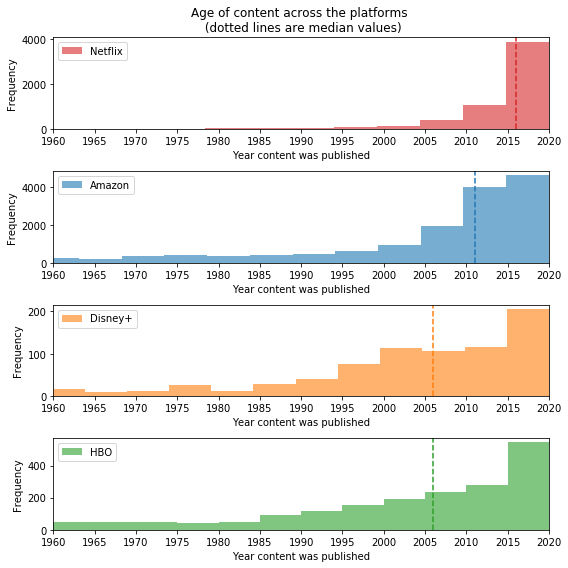

In [33]:
# Comparing how old the content is among all the streaming platforms

plt.figure(figsize=(8,8))
stream_list= ['Netflix','Amazon', 'Disney+', 'HBO']
color_list = ['tab:red','tab:blue','tab:orange','tab:green' ]

for i in range(4):
    plt.subplot(4,1,i+1)
    
    series= df[df['streaming']==stream_list[i]]['year']
    
    my_bin= int((max(series)-min(series))//5)
    
    plt.hist(series, color=color_list[i], alpha=0.6, label= stream_list[i], bins= my_bin,  )
    plt.axvline(np.median(series), color=color_list[i], linestyle='--', alpha=1 )
    plt.legend()
    
    plt.xlim(1960,2020)
    plt.xticks(range(1960,2021,5))
    
    if i==0:
        plt.title('Age of content across the platforms \n (dotted lines are median values)')
    plt.xlabel('Year content was published')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### 4.2 How high is the quality across the platforms?
- Quality can be measured by the IMDB and the rotten tomato ratings.

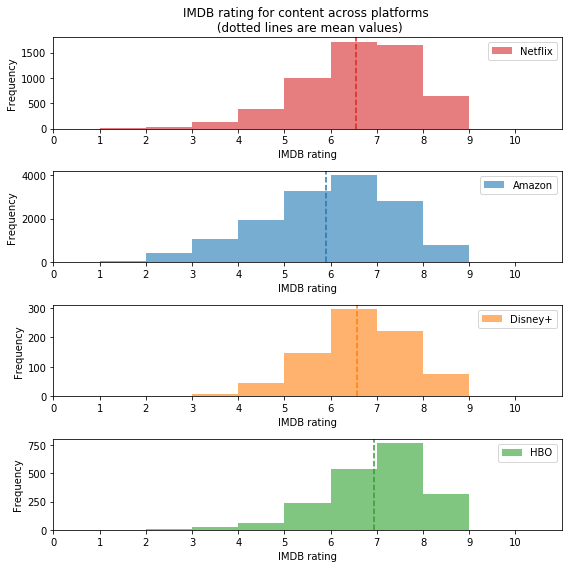

In [34]:
# Comparing imdb ratings among all the streaming platforms

plt.figure(figsize=(8,8))
stream_list= ['Netflix','Amazon', 'Disney+', 'HBO']
color_list = ['tab:red','tab:blue','tab:orange','tab:green' ]

for i in range(4):
    plt.subplot(4,1,i+1)
    
    series= df[df['streaming']==stream_list[i]]['imdb']
    my_bin= np.arange(10)
    
    plt.hist(series, color=color_list[i], alpha=0.6, label= stream_list[i], bins= my_bin,  )
    plt.axvline(np.mean(series), color=color_list[i], linestyle='--', alpha=1 )
    plt.legend()
    plt.xlim(0,11)
    plt.xticks(range(0,11,1))
    
    if i==0:
        plt.title('IMDB rating for content across platforms \n (dotted lines are mean values)')
    plt.xlabel('IMDB rating')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

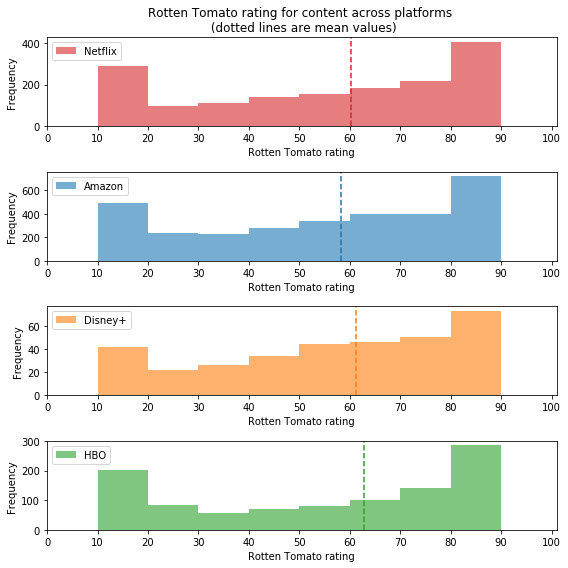

In [35]:
# Comparing rotten_tomato ratings among all the streaming platforms

plt.figure(figsize=(8,8))

stream_list= ['Netflix','Amazon', 'Disney+', 'HBO']
color_list = ['tab:red','tab:blue','tab:orange','tab:green' ]

for i in range(4):
    plt.subplot(4,1,i+1)
    
    series= df[df['streaming']==stream_list[i]]['rotten_tomato']
    my_bin= range(0,100,10)
    
    plt.hist(series, color=color_list[i], alpha=0.6, label= stream_list[i], bins= my_bin  )
    plt.axvline(np.mean(series), color=color_list[i], linestyle='--', alpha= 1 )
    plt.legend()
    plt.xlim(0,101)
    plt.xticks(range(0,101,10))
    
    if i==0:
        plt.title('Rotten Tomato rating for content across platforms \n (dotted lines are mean values)')
    plt.xlabel('Rotten Tomato rating')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### 4.3 Do older content have higher ratings?

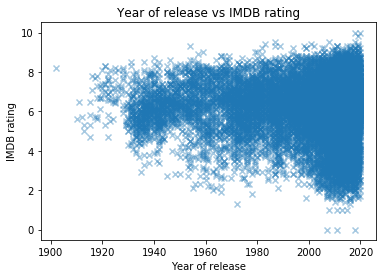

In [36]:
# Correlation between year of content and IMDB rating
plt.scatter(x=df.year, y= df.imdb,marker= 'x',alpha=0.4 )
plt.xlabel('Year of release')
plt.ylabel('IMDB rating')
plt.title('Year of release vs IMDB rating')
plt.show()

### 4.4 Correlation between IMDB and Rotten Tomato ratings

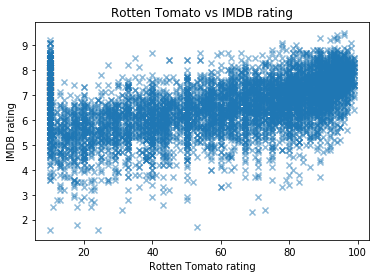

In [37]:
# Correlation between year of content and Rotten Tomato rating
plt.scatter(x=df.rotten_tomato, y= df.imdb,marker= 'x', alpha=0.5 )
plt.xlabel('Rotten Tomato rating')
plt.ylabel('IMDB rating')
plt.title('Rotten Tomato vs IMDB rating')
plt.show()

### 4.5 Number of titles in each age group

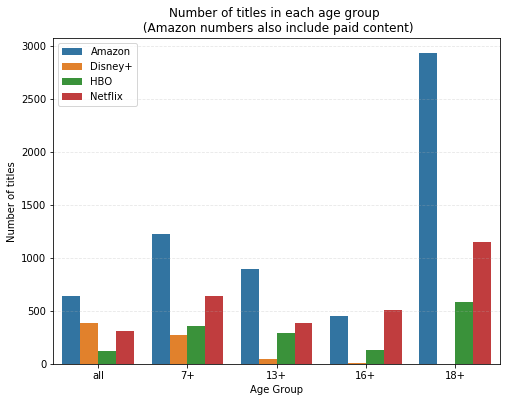

In [38]:
# Number of titles in each age group
plt.figure(figsize=(8,6))
age_plot= df.groupby(by=['age_group','streaming']).count()['title'].reset_index()

sns.barplot(x=age_plot.age_group, y= age_plot.title, hue= age_plot.streaming, order=['all','7+','13+','16+','18+'])
plt.grid(alpha=0.3,linestyle='--', axis= 'y' )
plt.legend()
plt.xlabel('Age Group')
plt.ylabel('Number of titles')
plt.title('Number of titles in each age group \n (Amazon numbers also include paid content)')
plt.show()

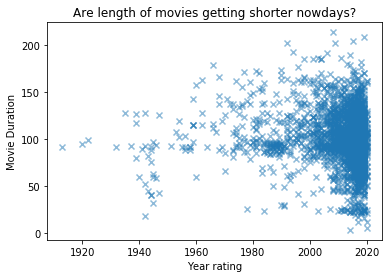

In [39]:
# Correlation between year and duration of movie
plt.scatter(x=df_merge.year, y= df_merge.runtime, marker= 'x', alpha=0.5 )
plt.xlabel('Year rating')
plt.ylabel('Movie Duration')
plt.title('Are length of movies getting shorter nowdays?')
plt.show()

### 4.6 Top online shows based on IMDB rating

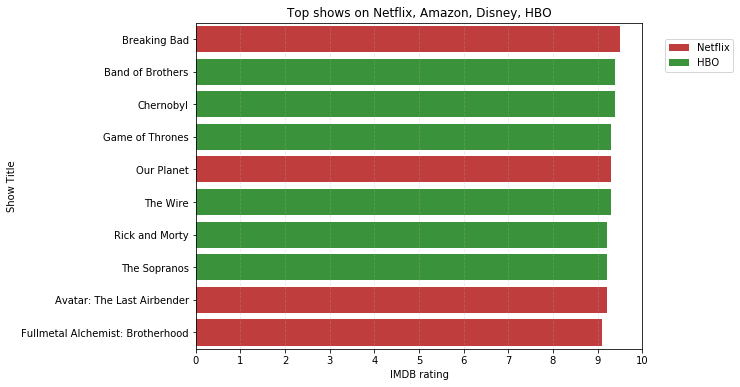

In [40]:
# Top online shows based on IMDB rating
imdb_top =df.sort_values(by=['imdb'],ascending= False).query('rotten_tomato>=0').head(10)
color_dic= {'Netflix':'tab:red','Amazon':'tab:blue', 'Disney':'tab:orange', 'HBO':'tab:green'}

plt.figure(figsize=(8,6))

#plt.barh(width= imdb_top.imdb , y= imdb_top.title_x , color=imdb_top.streaming_x.apply(lambda x: color_dic[x]), )
sns.barplot(x=imdb_top.imdb,y= imdb_top.title, hue=imdb_top.streaming, dodge= False, palette=['tab:red', 'tab:green'])
plt.grid(linestyle='--', alpha=0.3, axis='x')
plt.xticks(range(11))
plt.xlabel('IMDB rating')
plt.ylabel('Show Title')
plt.title('Top shows on Netflix, Amazon, Disney, HBO')
plt.legend(loc=(1.05,0.85))
plt.show()

### 4.7 Top 100 IMDB shows/ movies online

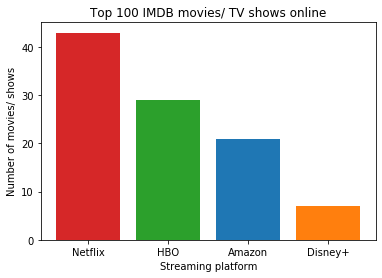

In [41]:
# Top 100 IMDB shows/ movies online

series= df.sort_values(by='imdb',ascending= False).query('rotten_tomato>=0').iloc[:100,:]['streaming'].value_counts()
plt.bar(x= series.index, height=series, color = ['tab:red','tab:green','tab:blue','tab:orange'] )
plt.xlabel('Streaming platform')
plt.ylabel('Number of movies/ shows')
plt.title('Top 100 IMDB movies/ TV shows online')
plt.show()

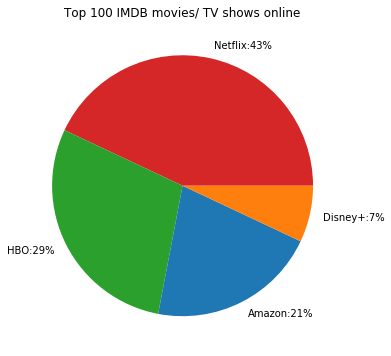

In [42]:
# Top 100 IMDB shows/ movies online
plt.figure(figsize=(8,6))
series= df.sort_values(by='imdb',ascending= False).query('rotten_tomato>=0').iloc[:100,:]['streaming'].value_counts()

plt.pie(series, colors= ['tab:red','tab:green','tab:blue','tab:orange'], \
        labels=[ x +':' + str(y)+'%' for x,y in zip(series.index, series)] )
plt.title('Top 100 IMDB movies/ TV shows online')
plt.show()

### 4.8 Comparing the original production of Netflix and Amazon Prime over the years.
Comparing the Original production between Netflix and Amazon Prime.

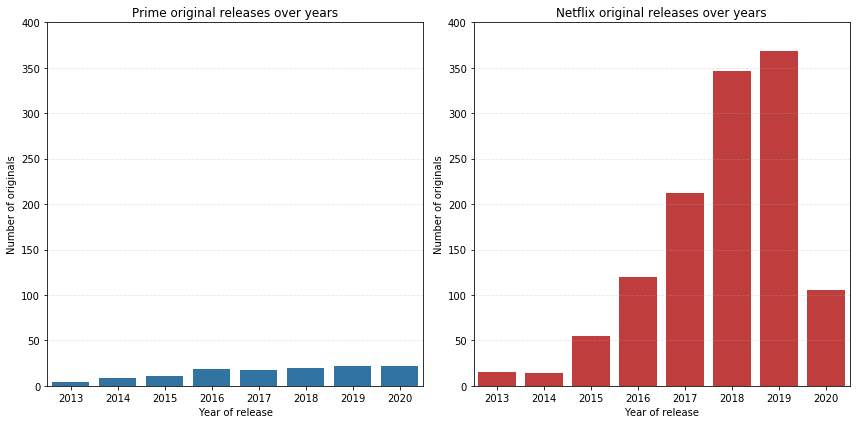

In [81]:
# Prime original production over years
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
series= df_merge.query('original== "1" and streaming_x=="Amazon" and year>=2013').year.value_counts()
sns.barplot(x= [int(x) for x in series.index] , y= series, color= 'tab:blue')
plt.grid(linestyle='--', alpha=0.3, axis='y')
plt.ylabel('Number of originals')
plt.xlabel('Year of release')
plt.title('Prime original releases over years')
#plt.yticks(range(0,25,2))
plt.yticks(range(0,450,50))

# Netflix original production over years
series= df_merge.query('original== "True" and streaming_x=="Netflix" and year>=2013').drop_duplicates(subset=['title_x'])['year'].value_counts()
plt.subplot(1,2,2)
sns.barplot(x= [int(x) for x in series.index] , y= series, color= 'tab:red')
plt.grid(linestyle='--', alpha=0.3, axis='y')
plt.ylabel('Number of originals')
plt.xlabel('Year of release')
plt.title('Netflix original releases over years')
plt.yticks(range(0,450,50))
plt.tight_layout()
plt.show()

### 4.9 Netflix original content analysis

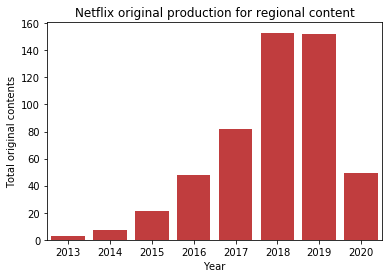

In [130]:
# Netflix original production for regional content
series= df_merge.query('original== "True" and streaming_x=="Netflix" and year>=2013').drop_duplicates(subset=['title_x']).groupby(by=['year','regional']).count()['title_x'].reset_index()

sns.barplot(x= [int(x) for x in series.year], y= series.title_x, color= 'tab:red'  )
plt.ylabel('Total original contents')
plt.xlabel('Year')
plt.title('Netflix original production for regional content')
plt.show()

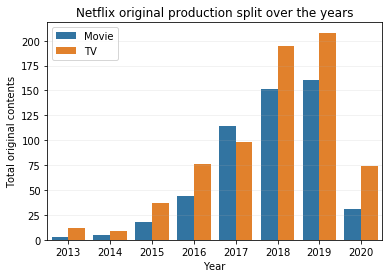

In [237]:
# Netflix original production split between TV and Movies
series= df_merge.query('original== "True" and streaming_x=="Netflix" and year>=2013').drop_duplicates(subset=['title_x']).groupby(by=['year','type']).count()['title_x'].reset_index()

sns.barplot(x= [int(x) for x in series.year], y= series.title_x, hue= series.type )
plt.legend()
plt.ylabel('Total original contents')
plt.xlabel('Year')
plt.title('Netflix original production split over the years')
plt.grid(alpha=0.2, axis='y')
plt.show()

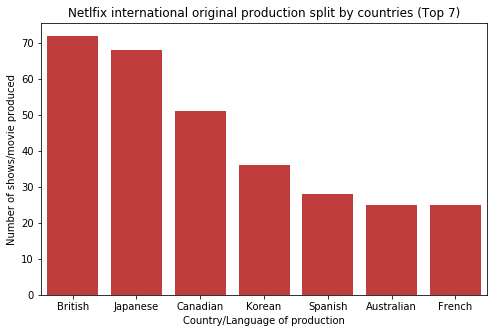

In [238]:
# International content split by country/ language
series= df_genre.query('original=="True" and country != "nan"').country.value_counts().head(7)

plt.figure(figsize=(8,5))
sns.barplot(x= [x.capitalize() for x in series.index], y= series, color= 'tab:red')
plt.ylabel('Number of shows/movie produced')
plt.xlabel('Country/Language of production')
plt.title('Netlfix international original production split by countries (Top 7)')
plt.show()

In [234]:
# Aggregating all the genre columns

def genre_func(condition):
    """Function to aggregate genres based on the condition provided
    Returns the top 7 genres and their corresponding percentages"""
    genre_agg_list= list()
    
    for genre in df_genre.columns[6:-3]:
        try:
            genre_agg_list.append(df_genre.query(condition)[genre].value_counts().values[0])
        except:
            genre_agg_list.append(0)

    genre_agg_df= pd.DataFrame({'Genre':df_genre.columns[6:-3],'Value':np.array(genre_agg_list)/df_genre.query(condition).shape[0]}).query('Genre != "misc" and Genre !="popular"')
    
    series = genre_agg_df.sort_values(by='Value',ascending=False).head(7)
    
    return series

### 4.10 Genre analysis of Netflix and Amazon Prime content

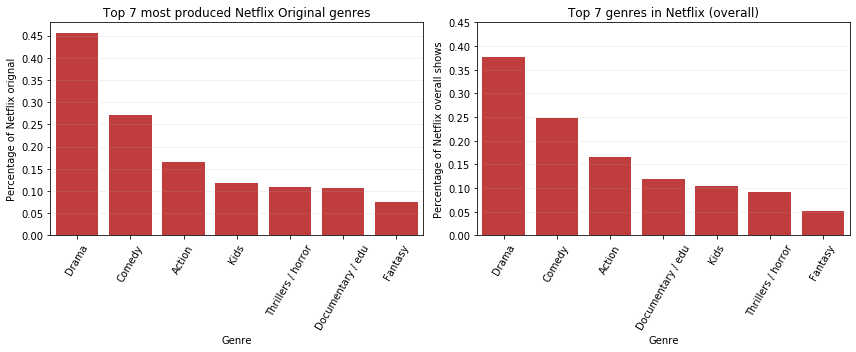

In [231]:
# Finding the most popular genres in the Netflix original category
series= genre_func('original=="True"')

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x= [x.replace('_',' / ').capitalize() for x in series.Genre], y= series.Value, color= 'tab:red')
plt.xlabel('Genre')
plt.ylabel('Percentage of Netflix orignal')
plt.title('Top 7 most produced Netflix Original genres')
plt.xticks(rotation=60)
plt.yticks(np.arange(0,0.5,0.05))
plt.grid(alpha=0.2, axis='y')

# Finding the most popular genres in Netflix (Overall)
series= genre_func('streaming=="Netflix"')

plt.subplot(1,2,2)
sns.barplot(x= [x.replace('_',' / ').capitalize() for x in series.Genre], y= series.Value, color= 'tab:red')
plt.xlabel('Genre')
plt.ylabel('Percentage of Netflix overall shows')
plt.title('Top 7 genres in Netflix (overall)')
plt.xticks(rotation=60)
plt.yticks(np.arange(0,0.5,0.05))
plt.grid(alpha=0.2, axis='y')

plt.tight_layout()
plt.show()

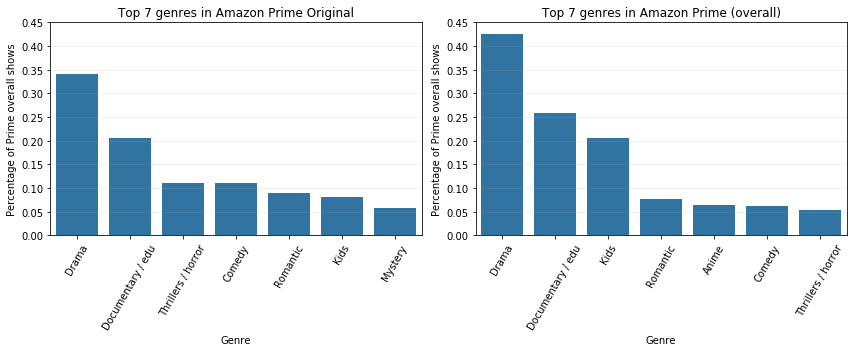

In [235]:
# Finding the most popular genres in Amazon Original production
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
series= genre_func('streaming=="Amazon" and original=="1"')

sns.barplot(x= [x.replace('_',' / ').capitalize() for x in series.Genre], y= series.Value, color= 'tab:blue')
plt.xlabel('Genre')
plt.ylabel('Percentage of Prime overall shows')
plt.title('Top 7 genres in Amazon Prime Original')
plt.xticks(rotation=60)
plt.yticks(np.arange(0,0.5,0.05))
plt.grid(alpha=0.2, axis='y')

# Finding the most popular genres in Amazon overall
series= genre_func('streaming=="Amazon"')

plt.subplot(1,2,2)
sns.barplot(x= [x.replace('_',' / ').capitalize() for x in series.Genre], y= series.Value, color= 'tab:blue')
plt.xlabel('Genre')
plt.ylabel('Percentage of Prime overall shows')
plt.title('Top 7 genres in Amazon Prime (overall)')
plt.xticks(rotation=60)
plt.yticks(np.arange(0,0.5,0.05))
plt.grid(alpha=0.2, axis='y')

plt.tight_layout()
plt.show()

## 5 Conclusion
In this project I have analyzed the content for Amazon, Netflix, Disney+ and HBO Max by scraping the data from the web. They key questions that I was interested in were- <br>

**1) Which streaming platform has the latest content?** <br>
Netflix has the latest content with the median age of produced content being 2016 compard with 2011 for Amazon and 2006 for HBO and Disney. <br>

**2) Does a particular streaming platform have more high quality content (IMDB rating) comapred to others?** <br>
HBO Max has the highest quality content with an average IMDB score of around 7 compared to Netflix and Disney which have a score of 6.5 and Amazon with 6. <br>

**3) Does a particular streaming platform have more fresh tomato content (Rotten Tomato rating) comapred to others?** <br>
All 4 online streaming providers have roughly similar Rotten Tomato rating of around 60% fresh tomatoes. <br>

**4) How does the amount of content in different streaming platform vary for different age groups?** <br>
Unsurpringly Disney has the maximum content for the youger audience while Amazon and Netflix have the most amount of content for 18+ age group. <br>

**5) Which platform has the highest rated IMDB shows available online?** <br>
HBO and Netflix own most of the top 10 rated IMDB shows with Netflix having the highest rated show, Breaking Bad, on its platform. HBO had 6/10 while Netflix had 4/10 of the top 10 shows. <br>
However, for the top 100 shows Netflix has 43%, HBO has 29% and Amazon has 21% of the shows. Disney lacks with streaming only 7% of the top 100 shows available online. <br>

**6) How much original contents are Netflix and Amazon creating?** <br>
Netflix made roughly 350 TV shows and movies every year since 2018 compared to Amazon's orginal production of around 20 shows per year. <br>

**7) In which genres is Netflix creating more original content?** <br>
Among all the original content produced in Netflix, 45% have drama genre and 25% have comedy genre. However, Amazon has 35% original shows in drama genre and 20% in Documentary genre. <br>

**8) Which genres are the most popular among Netflix and Amazon?** <br>
Drama, comedy and action are the top 3 genres in Netflix compared to Amazon which has drama, documentary and kids shows as its top 3 original content. <br>
